## [Practice 9] Road Segmentation
* 0. 실습 환경 설정
* 1. 데이터 준비하기
* 2. Training
* 3. Testing
* 4. Inference

### 0. 실습 환경 설정
* 가상환경명 : roadseg
* Python 버전 : python 3.7
* 설치 목록
    * !pip3 install --upgrade --no-cache-dir gdown
    * !pip install torch==1.7.1+cu110 torchvision==0.8.2+cu110 -f https://download.pytorch.org/whl/torch_stable.html
    * !pip install -r requirements.txt
    * albumentations
        * !pip uninstall albumentations
        * !pip install albumentations==0.5.1

* Unet++ Git 주소: https://github.com/4uiiurz1/pytorch-nested-unet
    *  archs.py 변경 : class NestedUNet(nn.Module):의 채널리스트부분 nb_filter = [16, 32, 64, 128, 256] 변경

In [ ]:
#!git clone https://github.com/4uiiurz1/pytorch-nested-unet

### 1. 데이터 준비하기

* TODO : 경로 이동 (pytorch-nested-unet root로 이동)

In [ ]:
cd

### 1-1. 데이터셋 다운로드
* TODO : 데이터셋 다운로드 및 압축풀기 [링크](https://s3.eu-central-1.amazonaws.com/avg-kitti/data_semantics.zip)
* TODO : `dir_path`에 {데이터셋 root}/training/semantic 경로 넣기

In [2]:
import os
import cv2
import numpy as np

dir_path = 
save_path = './inputs/road/'
label_images = os.listdir(dir_path)

if not os.path.exists(os.path.join(save_path, 'masks/0')):
      os.makedirs(os.path.join(save_path, 'masks/0'))

for file in label_images:
  img = cv2.imread(os.path.join(dir_path, file))
  gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  mask = np.zeros_like(gray_img)
  for i in range(mask.shape[0]):
    for j in range(mask.shape[1]):
      if gray_img[i][j] == 7:
        mask[i][j]= 255
      else:
        mask[i][j] = 0
  cv2.imwrite(os.path.join(save_path, 'masks/0', file), mask)

In [3]:
import os
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

DATA_DIR = './inputs/road/'

image_dir = os.path.join(DATA_DIR, 'images')
mask_dir = os.path.join(DATA_DIR, 'masks/0')

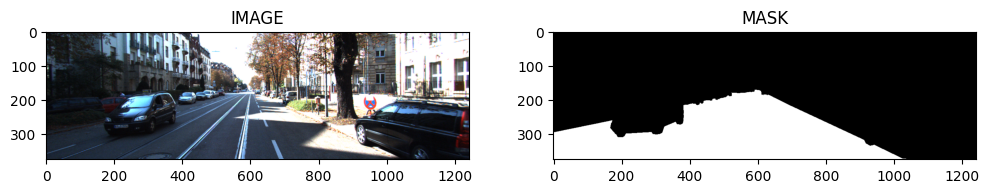

In [4]:
img = cv2.imread(os.path.join(image_dir, os.listdir(image_dir)[0]))
mask = cv2.imread(os.path.join(mask_dir, os.listdir(mask_dir)[0]))

plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
plt.title('IMAGE')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

plt.subplot(1,2,2)
plt.title('MASK')
plt.imshow(cv2.cvtColor(mask, cv2.COLOR_BGR2RGB))

### 2. Training

* dataset_path='./inputs/polyp'
* name = None
* epochs = 300
* batch_size = 8
* arch = 'NestedUNet'
* deep_supervision = False
* input_channels = 3
* num_classes = 1
* input_w = 384
* input_h = 384
* loss = 'BCEDiceLoss'
* dataset = 'polyp'
* img_ext = '.jpg'
* mask_ext = '.jpg'
* optimizer = 'Adam'
* learning_rate = 1e-4
* momentum = 0.9
* weight_decay = 1e-4
* nesterov = False
* scheduler = 'CosineAnnealingLR'
* min_lr = '1e-5'
* factor = 0.1
* patience = 2
* milestones = '1,2'
* gamma = 2/3
* early_stopping = -1
* num_workers = 4

* TODO : 경로 이동 (pytorch-nested-unet root로 이동)

In [ ]:
cd

* TODO : --dataset에는 road, --name에 road_segmentation 넣기

In [ ]:
!python train.py --dataset road --arch NestedUNet --name road_segmentation  --img_ext .png --mask_ext .png --epochs 300 --input_w 224 --input_h 224 --batch_size 16 --num_classes 1 --lr 0.0001

### 3. Testing

* TODO : 경로 이동 (pytorch-nested-unet root로 이동)

In [ ]:
cd

In [ ]:
!python val.py --name road_segmentation

### 4. Inference
* TODO : * archs.py 변경 : class NestedUNet(nn.Module):의 채널리스트부분 nb_filter = [16, 32, 64, 128, 256]

* TODO : 경로 이동 (pytorch-nested-unet root로 이동)

In [ ]:
cd

In [ ]:
from PIL import Image
import numpy as np
import os
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import torch
import archs
import yaml
from torchsummary import summary

* TODO : `best_model`에 학습한 가중치 넣기

In [3]:
best_model = 
yml_path = './models/road_segmentation/config.yml'

In [4]:
with open(yml_path) as f:
    data = yaml.load(f, Loader=yaml.FullLoader)
print(data)

{'arch': 'NestedUNet', 'batch_size': 16, 'dataset': 'road', 'deep_supervision': False, 'early_stopping': -1, 'epochs': 300, 'factor': 0.1, 'gamma': 0.6666666666666666, 'img_ext': '.png', 'input_channels': 3, 'input_h': 224, 'input_w': 224, 'loss': 'BCEDiceLoss', 'lr': 0.0001, 'mask_ext': '.png', 'milestones': '1,2', 'min_lr': 1e-05, 'momentum': 0.9, 'name': 'road_NestedUNet_woDS', 'nesterov': False, 'num_classes': 1, 'num_workers': 4, 'optimizer': 'SGD', 'patience': 2, 'scheduler': 'CosineAnnealingLR', 'weight_decay': 0.0001}


In [5]:
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model = archs3.__dict__[data['arch']](data['num_classes'],data['input_channels'],data['deep_supervision'])
model = model.to(DEVICE)
model.load_state_dict(torch.load(best_model, map_location=DEVICE))
print("model loaded")

model loaded


* TODO : 경로 지정
    * `test_folder` : {데이터셋 root}/testing/image_2 경로 넣기
    * `result_folder` : 결과 저장할 폴더 경로

In [6]:
test_folder = 
result_folder = 

if not os.path.exists(result_folder):
    os.makedirs(result_folder)

test_file_list = os.listdir(test_folder)

In [7]:
def blend_images(ori, pred):
    ori = cv2.cvtColor(ori, cv2.COLOR_BGR2RGB)
    output = Image.fromarray(pred)
    background = Image.fromarray(ori).convert('RGBA')
    output = output.resize((ori.shape[1], ori.shape[0])).convert('RGBA')
    output_final = Image.blend(background, output, alpha=0.5)
    return cv2.cvtColor(np.array(output_final), cv2.COLOR_BGR2RGB)

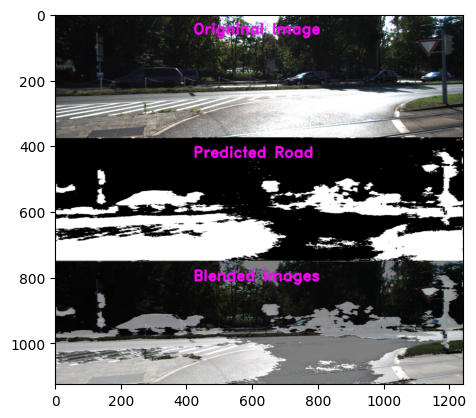

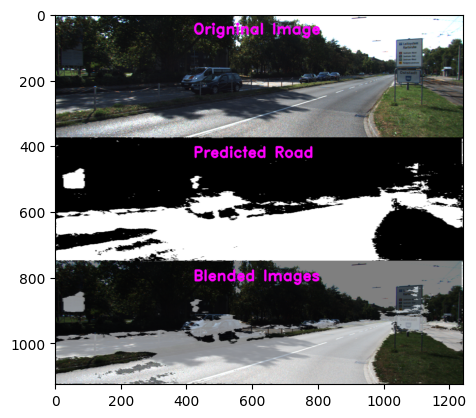

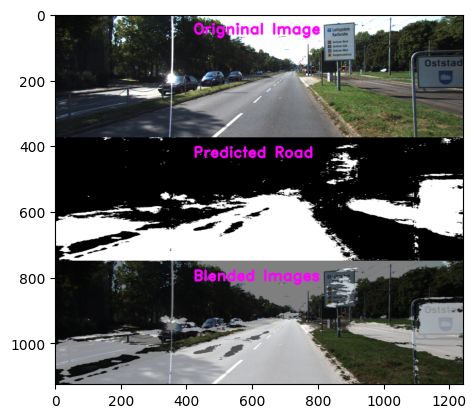

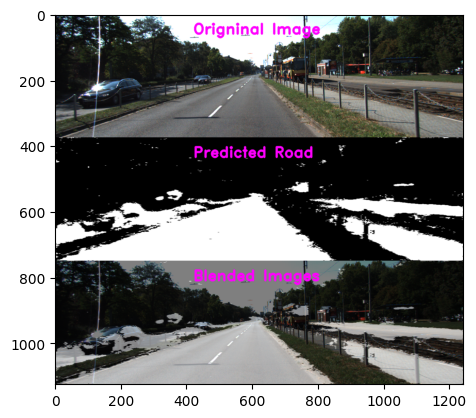

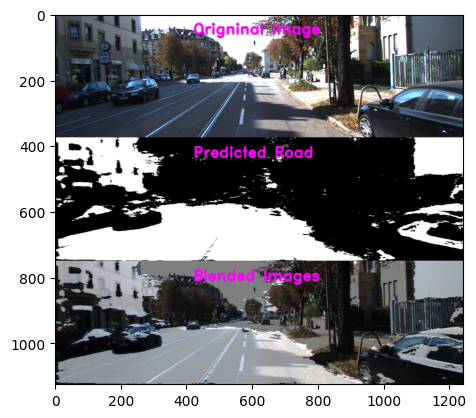

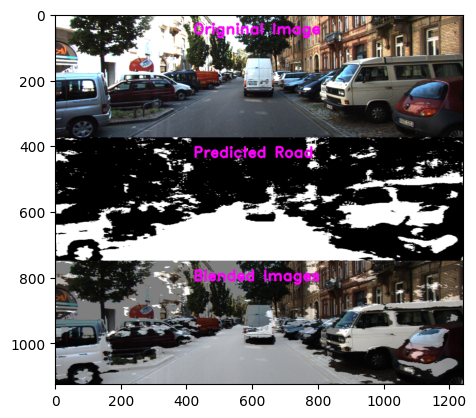

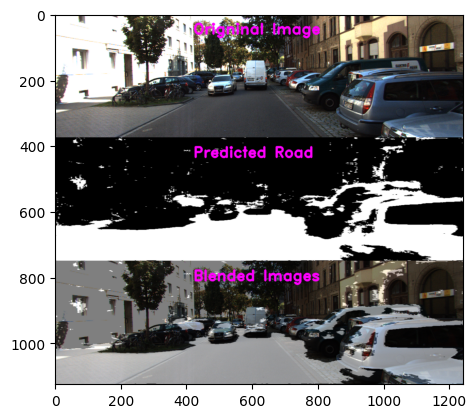

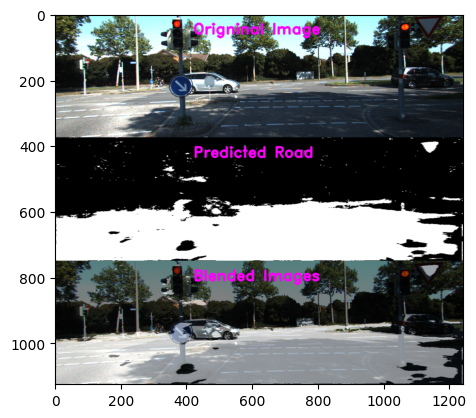

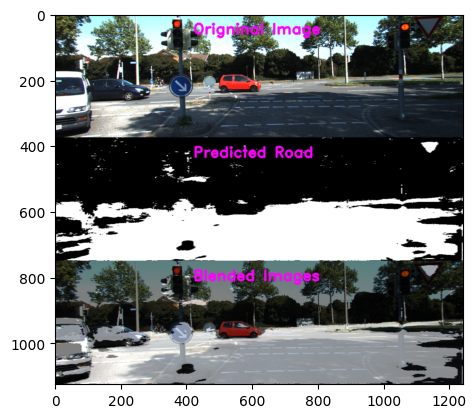

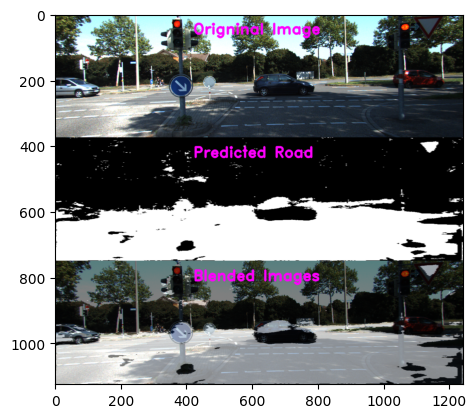

In [28]:
for idx, file in enumerate(test_file_list):
    black = np.zeros(shape = (375*3, 1242,3), dtype = np.uint8)
    img = cv2.imread(os.path.join(test_folder, file))
    input = cv2.resize(img, (224,224))
    input = input.astype('float32') / 255
    input = np.expand_dims(input, axis=0)
    input = torch.from_numpy(input).to(DEVICE)
    input = input.permute(0,3,1,2)
    output = model(input)
    output = torch.sigmoid(output)
    output = output.permute(0,2,3,1).cpu().detach()
    pred = np.array(output[0])*255
    _, pred = cv2.threshold(pred, 99, 255, cv2.THRESH_BINARY)
    pred = np.repeat(pred[..., np.newaxis], 3, -1)
    pred_resize= cv2.resize(pred, (img.shape[1], img.shape[0])).astype(np.uint8)
    output_final = blend_images(img, pred_resize)[:,:,:3]
    
    img_height, img_width, _ = img.shape
    im_height = 375
    im_width = 1242
    
    
    if img_height>375:
        black[0:im_height, 0:img_width, :] =  img[:375, :1242, :]
        black[im_height:im_height*2, 0:img_width, :] =  pred_resize[:375,:, :]
        black[im_height*2:im_height*3, 0:img_width, :] =  output_final[:375, :, :]
    elif img_width>1242:
        black[0:img_height, 0:im_width, :] =  img[:, :1242, :]
        black[im_height:im_height+img_height, 0:im_width, :] =  pred_resize[:, :1242, :]
        black[im_height*2:im_height*2+img_height, 0:im_width, :] =  output_final[:, :1242, :]
    else:
        black[0:img_height, 0:img_width, :] =  img[:, :, :]
        black[im_height:im_height+img_height, 0:img_width, :] =  pred_resize[:, :, :]
        black[im_height*2:im_height*2+img_height, 0:img_width, :] =  output_final[:, :, :]
    
    
    cv2.putText(black, "Origninal Image", (420,60),cv2.FONT_HERSHEY_DUPLEX, 1.5,(255,0,255), thickness=3, lineType=cv2.LINE_AA)
    cv2.putText(black, "Predicted Road", (420,435),cv2.FONT_HERSHEY_DUPLEX, 1.5,(255,0,255), thickness=3, lineType=cv2.LINE_AA)
    cv2.putText(black, "Blended Images", (420,810),cv2.FONT_HERSHEY_DUPLEX, 1.5,(255,0,255), thickness=3, lineType=cv2.LINE_AA)

    cv2.imwrite(os.path.join(result_folder, file), black)

    if idx <10:
        plt.imshow(cv2.cvtColor(black, cv2.COLOR_BGR2RGB))
        plt.show()
    
    if idx == 99:
        break
